In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Dados
70.000 imagens 

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(treino_img, treino_labels), (teste_img, teste_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
treino_img.shape

(60000, 28, 28)

In [6]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Mostrar as imagens

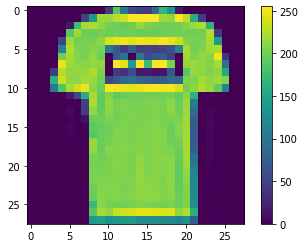

In [8]:
plt.figure()
plt.imshow(treino_img[1])
plt.colorbar()
plt.show()

## Pré-processando os dados 

In [9]:
treino_img = treino_img / 255.0
teste_img = teste_img / 255.0

## Criando o modelo

In [11]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), # Camada de entrada
                           keras.layers.Dense(128, activation="relu"), # Camada escondida com ativação ReLu
                           keras.layers.Dense(10, activation='softmax') # Camada de saída com ativação SoftMax
                           ])

## Compilando o modelo

In [12]:
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treinando

In [13]:
modelo.fit(treino_img, treino_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6349 - accuracy: 0.7771
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3138 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2995 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2770 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2537 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2435 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.234

## Avaliando

In [15]:
teste_loss, teste_acc = modelo.evaluate(teste_img,  teste_labels, verbose=1) 

print('Test accuracy:', teste_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8866
Test accuracy: 0.8866000175476074


## Verificando

Pick a number: 100


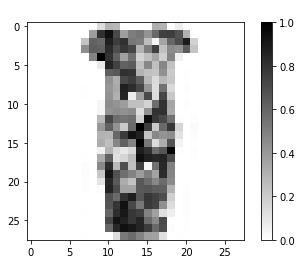

In [18]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = teste_img[num]
label = teste_labels[num]
predict(modelo, image, label)